# Los Angeles Weather Analysis
## The influence of Weather on the crime rate of LA 

### Contents
- Data Preparation
- Surronding Game Weather
- After Game Weather
- Good Weather
- Bad Weather
- Comparisons

In [1]:
import os.path
import datetime
import pylab
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if not os.path.exists('../../data/prep/laWea_prep.csv' ):
    print("Missing dataset file")

In [3]:
ch = pd.read_csv( '../../data/prep/laWea_prep.csv', index_col="Date", parse_dates=True)
dch = pd.read_csv( '../../data/prep/laWea_dom_prep.csv', index_col="Date", parse_dates=True)

In [4]:
ch.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2012-10-27 04:00:00,1.0,sky is clear,20.8,3,2,2,7,Moderate,NBA,Vandalism
2012-10-27 04:00:00,1.0,sky is clear,20.8,3,2,2,7,Moderate,NBA,Domestic
2012-10-27 04:00:00,1.0,sky is clear,20.8,3,2,2,7,Moderate,NBA,Domestic
2012-10-27 04:00:00,1.0,sky is clear,20.8,3,2,2,7,Moderate,NBA,Assault
2012-10-27 04:00:00,1.0,sky is clear,20.8,3,2,2,7,Moderate,NBA,Assault


In [5]:
dch.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2012-10-30 20:00:00,6,Moderate,NBA,Vandalism
2012-10-30 20:00:00,6,Moderate,NBA,Vandalism
2012-10-30 20:00:00,6,Moderate,NBA,Vandalism
2012-10-30 20:00:00,6,Moderate,NBA,Vandalism
2012-10-30 20:00:00,6,Moderate,NBA,Vandalism


## 2 hours before and 5 hours after

In [6]:
ch1 = ch.groupby('Primary Type')[('Primary Type')].count()
ch1.sort_values(ascending=False)

Primary Type
Assault      8096
Vandalism    6591
Domestic     3690
Name: Primary Type, dtype: int64

In [7]:
ch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(ch)

Primary Type
Assault      44.055069
Domestic     20.079447
Vandalism    35.865484
Name: Primary Type, dtype: float64

In [8]:
ass1 = ch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(ch)

Text(0.5,1,'Total crime percentage around Games')

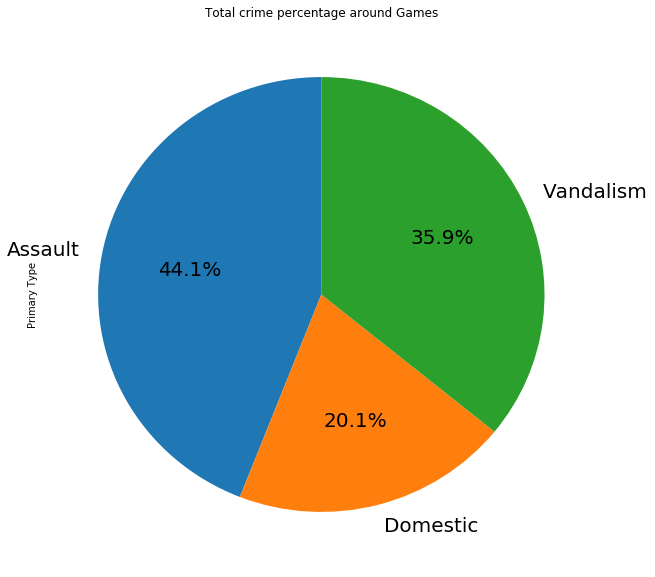

In [9]:
ass1.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Total crime percentage around Games')

# 7 hours after

In [10]:
dch1 = dch.groupby('Primary Type')[('Primary Type')].count()
dch1.sort_values(ascending=False)

Primary Type
Assault      7149
Vandalism    5815
Domestic     3378
Name: Primary Type, dtype: int64

In [11]:
dch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dch)

Primary Type
Assault      43.746175
Domestic     20.670665
Vandalism    35.583160
Name: Primary Type, dtype: float64

In [12]:
dome = dch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dch)

Text(0.5,1,'Total crime percentage in 7 hours after game')

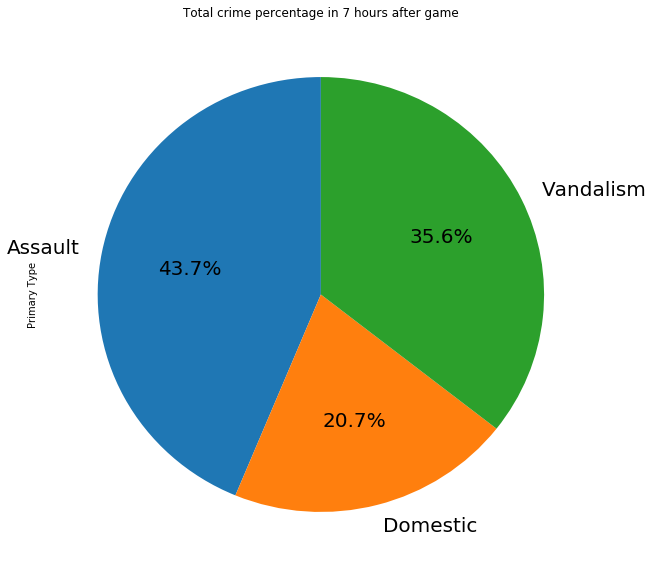

In [13]:
dome.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Total crime percentage in 7 hours after game')

# Good

In [14]:
good = ch[ch["Weather"] == "Good"]

In [15]:
good1 = good.groupby('Primary Type')[('Primary Type')].count()
good1.sort_values(ascending=False)

Primary Type
Assault      2631
Vandalism    2147
Domestic     1273
Name: Primary Type, dtype: int64

In [16]:
good.groupby('Primary Type')[('Primary Type')].size()*100/len(good)

Primary Type
Assault      43.480416
Domestic     21.037845
Vandalism    35.481739
Name: Primary Type, dtype: float64

In [17]:
gd = good.groupby('Primary Type')[('Primary Type')].size()*100/len(good)

Text(0.5,1,'Good weather crime percentage surrounding game')

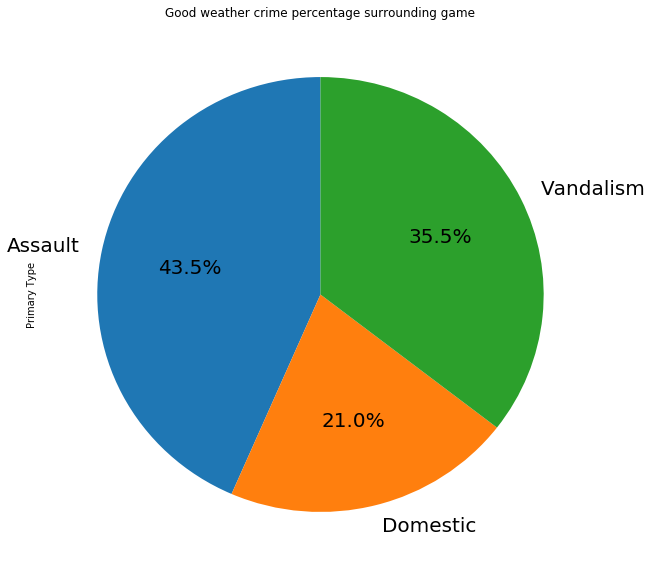

In [18]:
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Good weather crime percentage surrounding game')

In [19]:
good.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Vandalism
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Vandalism
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Domestic
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Assault
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Assault


In [20]:
good.groupby('Overall')[('Weather')].count()

Overall
8    5253
9     798
Name: Weather, dtype: int64

In [21]:
conditions = [
    (good['Overall'] == 9)]
choices = ['Very good']
good['Heat'] = np.select(conditions, choices, default='Good')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
good.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type,Heat
Date,,,,,,,,,,,
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Vandalism,Good
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Vandalism,Good
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Domestic,Good
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Assault,Good
2012-11-05 18:00:00,1.0,sky is clear,23.32,3,3,2,8,Good,NBA,Assault,Good


In [23]:
vg = good[good["Heat"] == "Very good"]

In [24]:
vg1 = vg.groupby('Primary Type')[('Primary Type')].count()
vg1.sort_values(ascending=False)

Primary Type
Assault      337
Vandalism    283
Domestic     178
Name: Primary Type, dtype: int64

In [25]:
vg.groupby('Primary Type')[('Primary Type')].size()*100/len(vg)

Primary Type
Assault      42.230576
Domestic     22.305764
Vandalism    35.463659
Name: Primary Type, dtype: float64

In [26]:
wvg = vg.groupby('Primary Type')[('Primary Type')].size()*100/len(vg)

Text(0.5,1,'Very good weather crime percentage surrounding game')

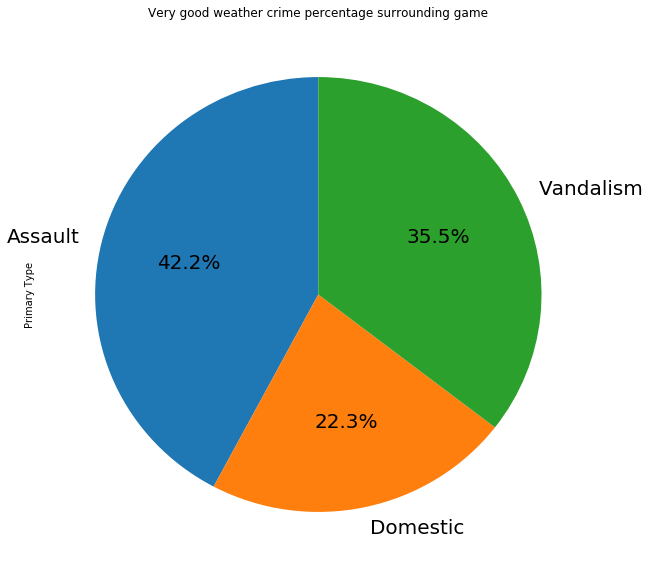

In [27]:
wvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very good weather crime percentage surrounding game')

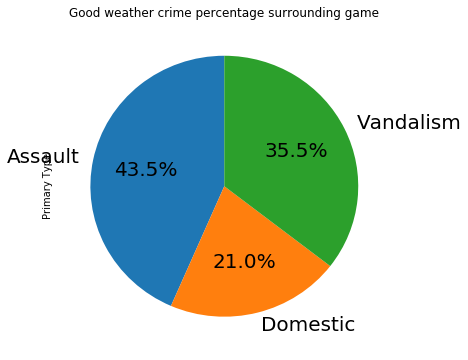

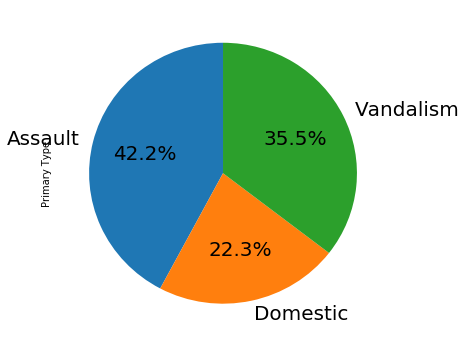

In [28]:
plt.subplot()
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (6, 6))
plt.title('Good weather crime percentage surrounding game')
plt.show()

wvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (6, 6))
plt.show()

### Good Weather and Domestic violence

In [29]:
dgood = dch[dch["Weather"] == "Good"]

In [30]:
dgood1 = dgood.groupby('Primary Type')[('Primary Type')].count()
dgood1.sort_values(ascending=False)

Primary Type
Assault      2391
Vandalism    1984
Domestic     1180
Name: Primary Type, dtype: int64

In [31]:
dgood.groupby('Primary Type')[('Primary Type')].size()*100/len(dgood)

Primary Type
Assault      43.042304
Domestic     21.242124
Vandalism    35.715572
Name: Primary Type, dtype: float64

In [32]:
dgd = dgood.groupby('Primary Type')[('Primary Type')].size()*100/len(dgood)

Text(0.5,1,'Good weather crime percentage after game')

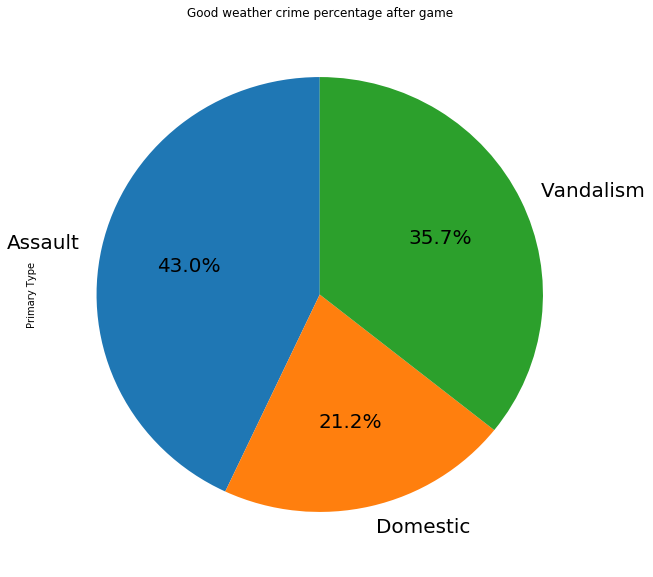

In [33]:
dgd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Good weather crime percentage after game')

In [34]:
dgood.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2012-11-05 20:00:00,8,Good,NBA,Vandalism
2012-11-05 20:00:00,8,Good,NBA,Vandalism
2012-11-05 20:00:00,8,Good,NBA,Vandalism
2012-11-05 20:00:00,8,Good,NBA,Vandalism
2012-11-05 20:00:00,8,Good,NBA,Vandalism


In [35]:
dgood.groupby('Overall')[('Weather')].count()

Overall
8    4945
9     610
Name: Weather, dtype: int64

In [36]:
conditions = [
    (dgood['Overall'] == 9)]
choices = ['Very good']
dgood['Heat'] = np.select(conditions, choices, default='Good')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
dgood.head()

,Overall,Weather,Domestic,Primary Type,Heat
Date,,,,,
2012-11-05 20:00:00,8,Good,NBA,Vandalism,Good
2012-11-05 20:00:00,8,Good,NBA,Vandalism,Good
2012-11-05 20:00:00,8,Good,NBA,Vandalism,Good
2012-11-05 20:00:00,8,Good,NBA,Vandalism,Good
2012-11-05 20:00:00,8,Good,NBA,Vandalism,Good


In [38]:
dvg = dgood[dgood["Heat"] == "Very good"]

In [39]:
dvg1 = dvg.groupby('Primary Type')[('Primary Type')].count()
dvg1.sort_values(ascending=False)

Primary Type
Assault      250
Vandalism    221
Domestic     139
Name: Primary Type, dtype: int64

In [40]:
dvg.groupby('Primary Type')[('Primary Type')].size()*100/len(dvg)

Primary Type
Assault      40.983607
Domestic     22.786885
Vandalism    36.229508
Name: Primary Type, dtype: float64

In [41]:
wdvg = dvg.groupby('Primary Type')[('Primary Type')].size()*100/len(dvg)

Text(0.5,1,'Very good weather crime percentage after game')

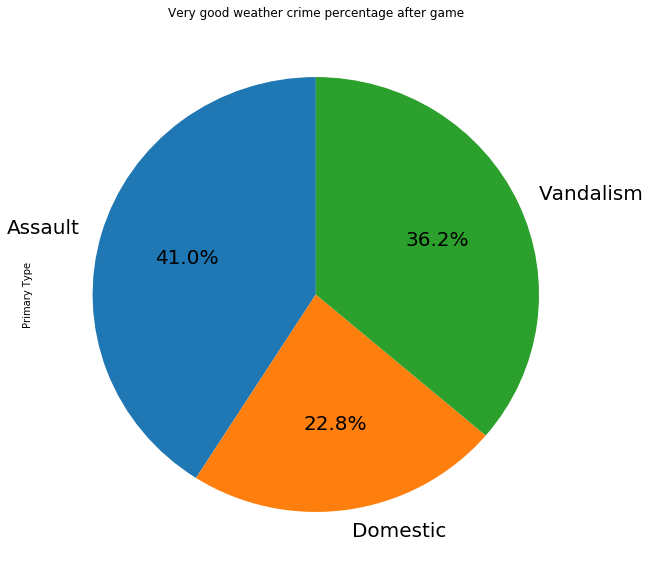

In [42]:
wdvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very good weather crime percentage after game')

# Bad

In [43]:
bad = ch[ch["Weather"] == "Bad"]

In [44]:
bad1 = bad.groupby('Primary Type')[('Primary Type')].count()
bad1.sort_values(ascending=False)

Primary Type
Assault      1652
Vandalism    1284
Domestic      697
Name: Primary Type, dtype: int64

In [45]:
bad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(bad)

Primary Type
Assault      45.472062
Domestic     19.185246
Vandalism    35.342692
Name: Primary Type, dtype: float64

In [46]:
bd = bad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(bad)

Text(0.5,1,'Bad weather crime percentage surrounding game')

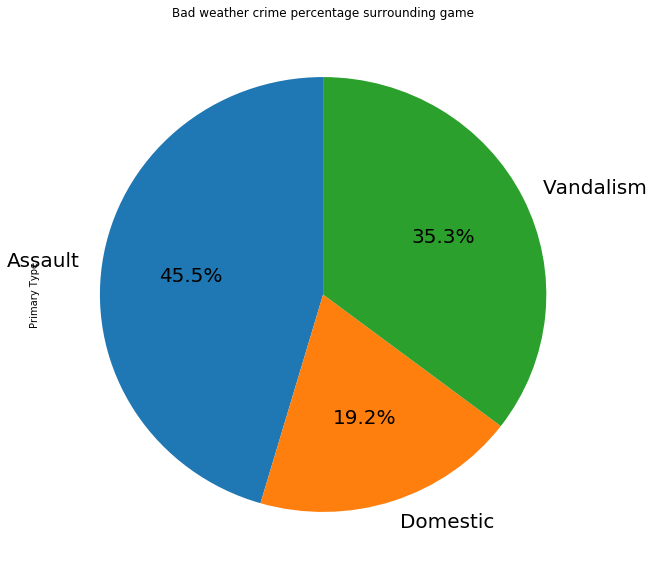

In [47]:
bd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Bad weather crime percentage surrounding game')

In [48]:
bad.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism


In [49]:
conditions = [
    (bad['Overall'] < 3)]
choices = ['Very bad']
bad['Cold'] = np.select(conditions, choices, default='Bad')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
bad.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type,Cold
Date,,,,,,,,,,,
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism,Bad
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism,Bad
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism,Bad
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism,Bad
2012-10-31 18:00:00,0.0,mist,20.91,0,2,3,5,Bad,NBA,Vandalism,Bad


In [51]:
vb = bad[bad["Cold"] == "Very bad"]

In [52]:
vb1 = vb.groupby('Primary Type')[('Primary Type')].count()
vb1.sort_values(ascending=False)

Primary Type
Assault      169
Vandalism    136
Domestic      82
Name: Primary Type, dtype: int64

In [53]:
vb.groupby('Primary Type')[('Primary Type')].size()*100/len(vb)

Primary Type
Assault      43.669251
Domestic     21.188630
Vandalism    35.142119
Name: Primary Type, dtype: float64

In [54]:
wvb = vb.groupby('Primary Type')[('Primary Type')].size()*100/len(vb)

Text(0.5,1,'Very bad weather crime percentage surrounding game')

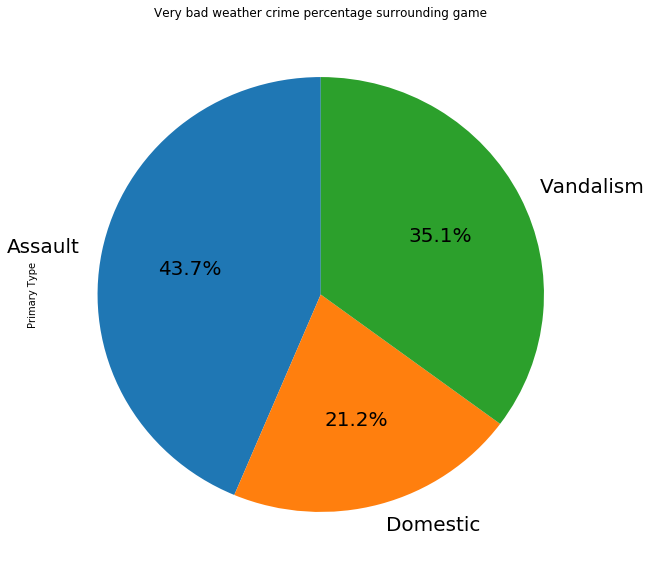

In [55]:
wvb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage surrounding game')

### Bad Weather and Domestic Violence

In [56]:
dbad = dch[dch["Weather"] == "Bad"]

In [57]:
dbad1 = dbad.groupby('Primary Type')[('Primary Type')].count()
dbad1.sort_values(ascending=False)

Primary Type
Assault      1421
Vandalism    1070
Domestic      628
Name: Primary Type, dtype: int64

In [58]:
dbad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dbad)

Primary Type
Assault      45.559474
Domestic     20.134659
Vandalism    34.305867
Name: Primary Type, dtype: float64

In [59]:
wdb = dbad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dbad)

Text(0.5,1,'Very bad weather crime percentage after game')

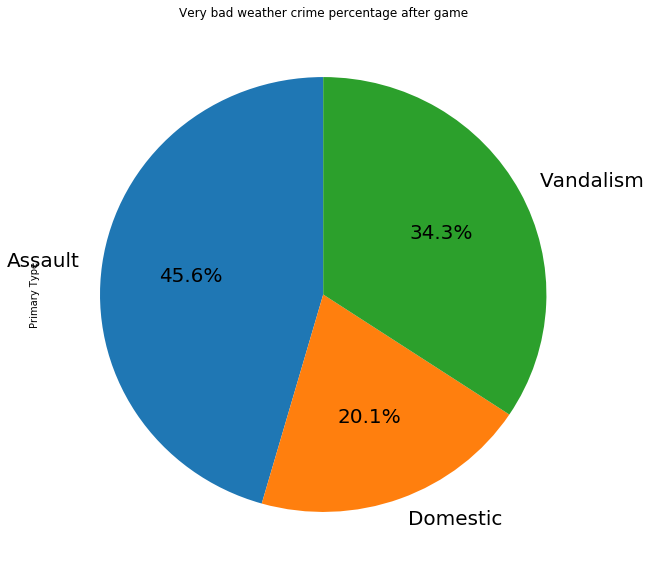

In [60]:
wdb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage after game')

In [61]:
dbad.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2012-10-31 20:00:00,4,Bad,NBA,Vandalism
2012-10-31 20:00:00,4,Bad,NBA,Vandalism
2012-10-31 20:00:00,4,Bad,NBA,Vandalism
2012-10-31 20:00:00,4,Bad,NBA,Vandalism
2012-10-31 20:00:00,4,Bad,NBA,Vandalism


In [62]:
conditions = [
    (dbad['Overall'] < 3)]
choices = ['Very bad']
dbad['Cold'] = np.select(conditions, choices, default='Bad')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
dbad.head()

,Overall,Weather,Domestic,Primary Type,Cold
Date,,,,,
2012-10-31 20:00:00,4,Bad,NBA,Vandalism,Bad
2012-10-31 20:00:00,4,Bad,NBA,Vandalism,Bad
2012-10-31 20:00:00,4,Bad,NBA,Vandalism,Bad
2012-10-31 20:00:00,4,Bad,NBA,Vandalism,Bad
2012-10-31 20:00:00,4,Bad,NBA,Vandalism,Bad


In [64]:
dvb = dbad[dbad["Cold"] == "Very bad"]

In [65]:
dvb1 = dvb.groupby('Primary Type')[('Primary Type')].count()
dvb1.sort_values(ascending=False)

Primary Type
Assault      127
Vandalism     89
Domestic      62
Name: Primary Type, dtype: int64

In [66]:
dvb.groupby('Primary Type')[('Primary Type')].size()*100/len(dvb)

Primary Type
Assault      45.683453
Domestic     22.302158
Vandalism    32.014388
Name: Primary Type, dtype: float64

In [67]:
wdvb = dvb.groupby('Primary Type')[('Primary Type')].size()*100/len(dvb)

Text(0.5,1,'Very bad weather crime percentage after game')

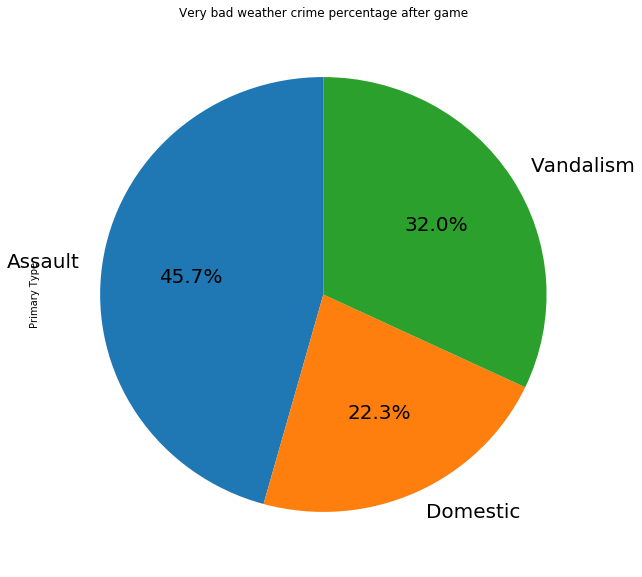

In [68]:
wdvb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage after game')

# Moderate

In [69]:
mod = ch[ch["Weather"] == "Moderate"]

In [70]:
mod1 = mod.groupby('Primary Type')[('Weather')].count()
mod1.sort_values(ascending=False)

Primary Type
Assault      3813
Vandalism    3160
Domestic     1720
Name: Weather, dtype: int64

In [71]:
mod.groupby('Primary Type')[('Weather')].size() * 100 / len(mod)

Primary Type
Assault      43.862878
Domestic     19.786035
Vandalism    36.351087
Name: Weather, dtype: float64

In [72]:
md = mod.groupby('Primary Type')[('Weather')].size() * 100 / len(mod)

Text(0.5,1,'Moderate weather crime percentage surrounding game')

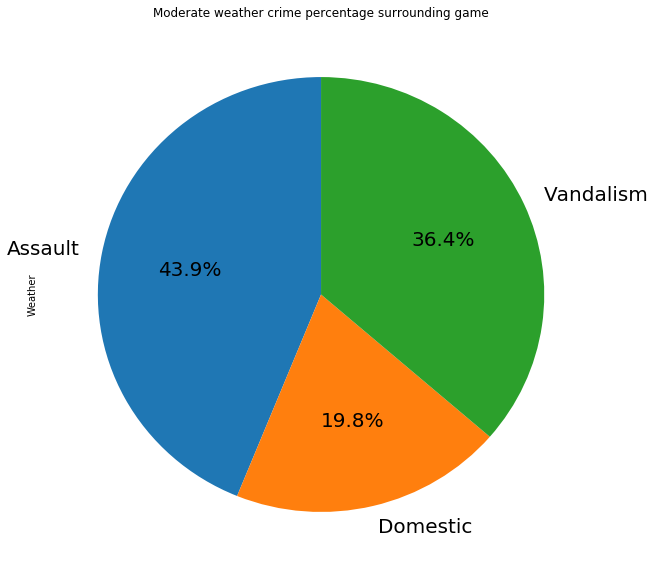

In [73]:
md.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Moderate weather crime percentage surrounding game')

# Comparison

### Surrounding Game (Focusing on Assault and Vandalism)

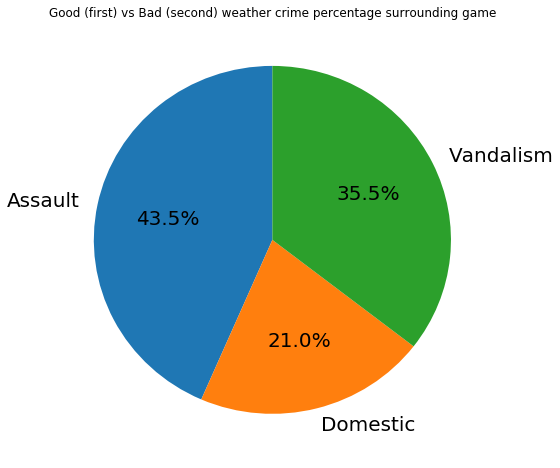

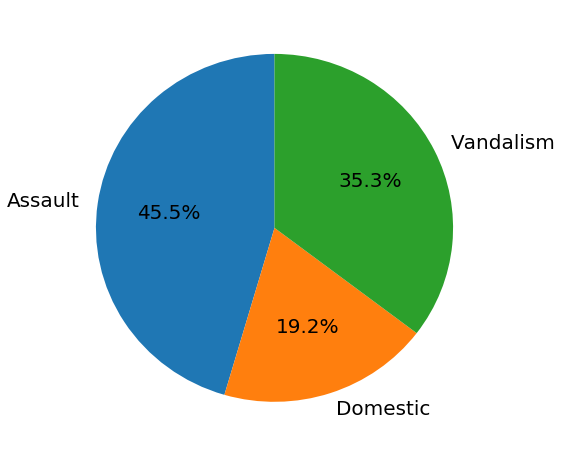

In [74]:
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
plt.title('Good (first) vs Bad (second) weather crime percentage surrounding game')
pylab.ylabel('')
plt.show()

bd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
pylab.ylabel('')
plt.show()


### After Game (Focusing on Domestic Violence)

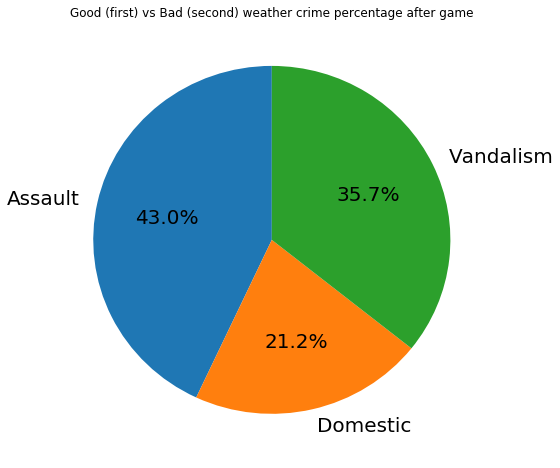

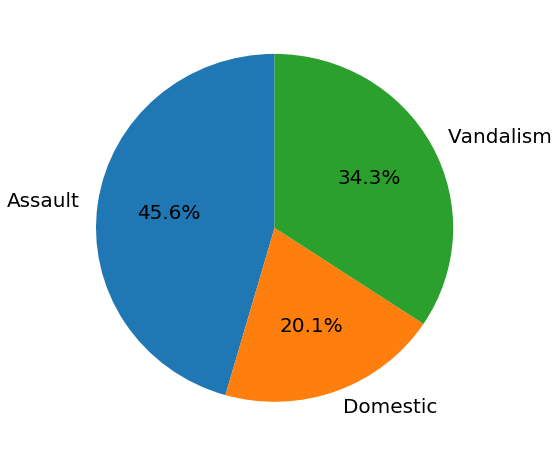

In [75]:
dgd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
plt.title('Good (first) vs Bad (second) weather crime percentage after game')
pylab.ylabel('')
plt.show()

wdb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
pylab.ylabel('')
plt.show()


### Domestic Overall

In [76]:
r9 = dch[dch["Overall"] == 9]
r9.groupby('Primary Type')[('Weather')].size() * 100 / len(r9)

Primary Type
Assault      40.983607
Domestic     22.786885
Vandalism    36.229508
Name: Weather, dtype: float64

In [77]:
r8 = dch[dch["Overall"] == 8]
r8.groupby('Primary Type')[('Weather')].size() * 100 / len(r8)

Primary Type
Assault      43.296259
Domestic     21.051567
Vandalism    35.652174
Name: Weather, dtype: float64

In [78]:
r7 = dch[dch["Overall"] == 7]
r7.groupby('Primary Type')[('Weather')].size() * 100 / len(r7)

Primary Type
Assault      42.547796
Domestic     20.522825
Vandalism    36.929380
Name: Weather, dtype: float64

In [79]:
r6 = dch[dch["Overall"] == 6]
r6.groupby('Primary Type')[('Weather')].size() * 100 / len(r6)

Primary Type
Assault      45.476003
Domestic     20.377655
Vandalism    34.146341
Name: Weather, dtype: float64

In [80]:
r5 = dch[dch["Overall"] == 5]
r5.groupby('Primary Type')[('Weather')].size() * 100 / len(r5)

Primary Type
Assault      46.800000
Domestic     20.342857
Vandalism    32.857143
Name: Weather, dtype: float64

In [81]:
r4 = dch[dch["Overall"] == 4]
r4.groupby('Primary Type')[('Weather')].size() * 100 / len(r4)

Primary Type
Assault      41.292876
Domestic     19.525066
Vandalism    39.182058
Name: Weather, dtype: float64

In [82]:
r3 = dch[dch["Overall"] == 3]
r3.groupby('Primary Type')[('Weather')].size() * 100 / len(r3)

Primary Type
Assault      48.648649
Domestic     18.618619
Vandalism    32.732733
Name: Weather, dtype: float64

In [83]:
r2 = dch[dch["Overall"] == 2]
r2.groupby('Primary Type')[('Weather')].size() * 100 / len(r2)

Primary Type
Assault      45.683453
Domestic     22.302158
Vandalism    32.014388
Name: Weather, dtype: float64

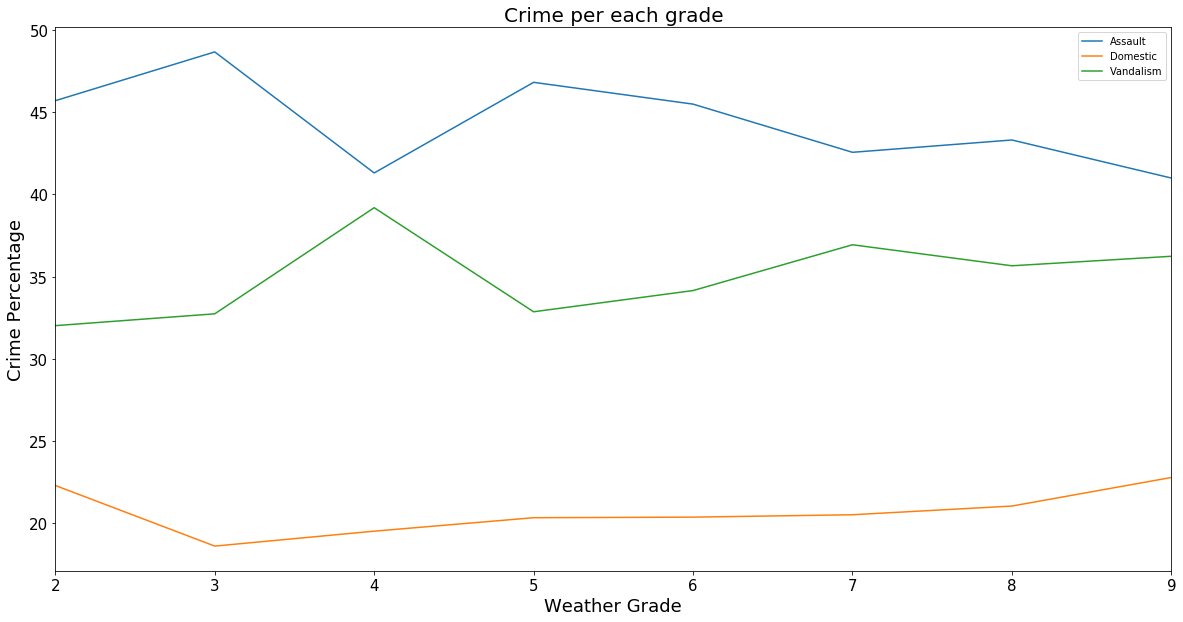

In [84]:
data = pd.DataFrame({  'Assault':[45.683453,48.648649,41.292876,46.800000,45.476003,42.547796,43.296259,40.983607], 
                     'Domestic':[22.302158,18.618619,19.525066,20.342857,20.377655,20.522825,21.051567,22.786885], 
                     'Vandalism':[32.014388,32.732733,39.182058,32.857143,34.146341,36.929380,35.652174,36.229508], }, 
                    index=range(2,10))

data.plot(figsize = (20, 10))
#ax.set(xlabel="Weather Grade", ylabel="Crime percentage")
plt.xlabel('Weather Grade', fontsize=18)
plt.ylabel('Crime Percentage', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Crime per each grade', fontsize=20)
plt.show()

For the most part, as the weather gets better the percentage of crimes that are of the type domestic violence decreases. Alternatevely, the percentage that are of the type assaults increases. Vandalism also decreases a significant amount. 

### Assault and Vandalism Overall

In [85]:
r9 = ch[ch["Overall"] == 9]
r9.groupby('Primary Type')[('Weather')].size() * 100 / len(r9)

Primary Type
Assault      42.230576
Domestic     22.305764
Vandalism    35.463659
Name: Weather, dtype: float64

In [86]:
r8 = ch[ch["Overall"] == 8]
r8.groupby('Primary Type')[('Weather')].size() * 100 / len(r8)

Primary Type
Assault      43.670284
Domestic     20.845231
Vandalism    35.484485
Name: Weather, dtype: float64

In [87]:
r7 = ch[ch["Overall"] == 7]
r7.groupby('Primary Type')[('Weather')].size() * 100 / len(r7)

Primary Type
Assault      42.963207
Domestic     20.145191
Vandalism    36.891602
Name: Weather, dtype: float64

In [88]:
r6 = ch[ch["Overall"] == 6]
r6.groupby('Primary Type')[('Weather')].size() * 100 / len(r6)

Primary Type
Assault      45.934650
Domestic     18.958967
Vandalism    35.106383
Name: Weather, dtype: float64

In [89]:
r5 = ch[ch["Overall"] == 5]
r5.groupby('Primary Type')[('Weather')].size() * 100 / len(r5)

Primary Type
Assault      46.887052
Domestic     19.559229
Vandalism    33.553719
Name: Weather, dtype: float64

In [90]:
r4 = ch[ch["Overall"] == 4]
r4.groupby('Primary Type')[('Weather')].size() * 100 / len(r4)

Primary Type
Assault      42.095588
Domestic     18.106618
Vandalism    39.797794
Name: Weather, dtype: float64

In [91]:
r3 = ch[ch["Overall"] == 3]
r3.groupby('Primary Type')[('Weather')].size() * 100 / len(r3)

Primary Type
Assault      50.728863
Domestic     18.367347
Vandalism    30.903790
Name: Weather, dtype: float64

In [92]:
r2 = ch[ch["Overall"] == 2]
r2.groupby('Primary Type')[('Weather')].size() * 100 / len(r2)

Primary Type
Assault      43.669251
Domestic     21.188630
Vandalism    35.142119
Name: Weather, dtype: float64

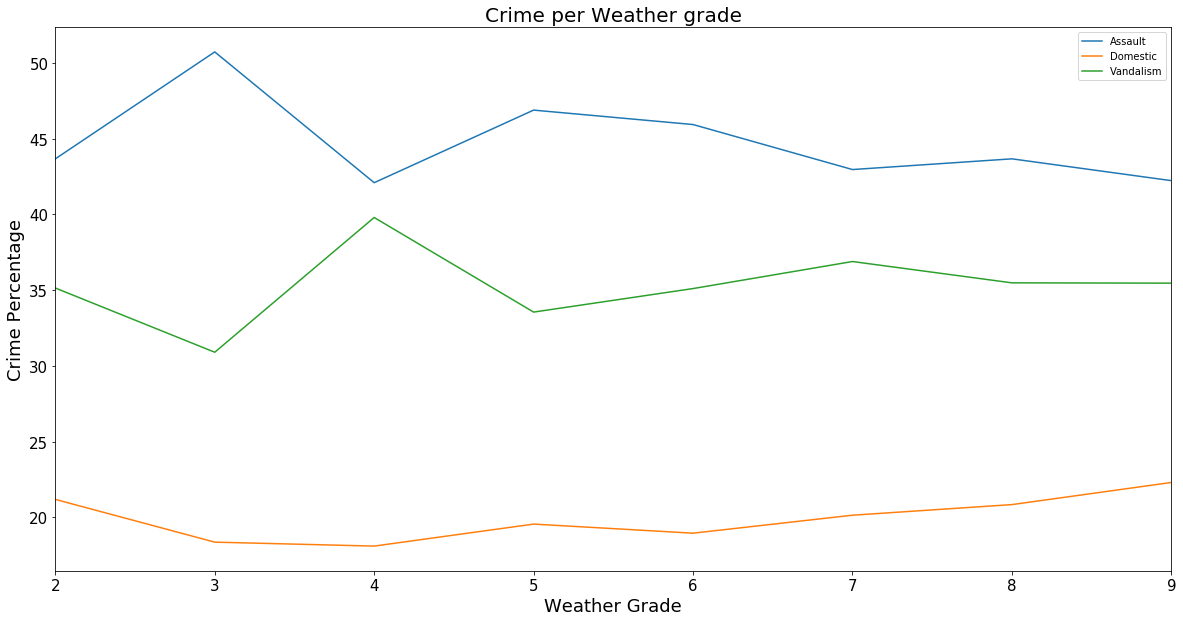

In [93]:
data = pd.DataFrame({  'Assault':[43.669251,50.728863,42.095588,46.887052,45.934650,42.963207,43.670284,42.230576], 
                     'Domestic':[21.188630,18.367347,18.106618,19.559229,18.958967,20.145191,20.845231,22.305764], 
                     'Vandalism':[35.142119,30.903790,39.797794,33.553719,35.106383,36.891602,35.484485,35.463659], }, 
                    index=range(2,10))

data.plot(figsize = (20, 10))
#ax.set(xlabel="Weather Grade", ylabel="Crime percentage")
plt.xlabel('Weather Grade', fontsize=18)
plt.ylabel('Crime Percentage', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Crime per Weather grade', fontsize=20)
plt.show()

Both assault and vandalism were consistent until weather grade 5. They then parted ways. Assault went on a rapid incline, to over 42.5%, whereas vandalism dropped to below 27.5%. 